# I. Lý thuyết

1) Tại sao các mô hình deep learning lại chiếm ưu thế hơn so với các mô hình machine learning truyền thống đối với dữ liệu lớn ?

A. Do mô hình deep learning có thể được thiết kế với kích thước tùy ý nên có khả năng xấp xỉ mọi hàm số. Do đó nó có khả năng biểu diễn tốt và hoạt động hiệu quả trên dữ liệu lớn.

B. Các mô hình machine learning thường bị overfitting đối với dữ liệu lớn ?

C. Các mô hình deep learning có chi phí huấn luyện tốn kém hơn so với machine learning.

D. Do kiến trúc của mô hình Machine Learning bao gồm nhiều layers xếp chồng.

Đáp án: A


2) Ý nghĩa của hàm loss function trong mạng neural network là gì ?


B. Mục tiêu của quá trình huấn luyện là tối thiểu hóa hàm loss function bằng thuật toán gradient descent. Giá trị của hàm số này giúp đo lường mức độ khớp của dự báo từ mô hình trên dữ liệu huấn luyện.

Đáp án: B


3) Khi huấn luyện trên các bộ dữ liệu bigdata thì chúng ta nên sử dụng phương pháp nào ?


C) Mini-batch gradient descent huấn luyện mô hình trên từng tập dữ liệu con có kích thước nhỏ hơn memory CPU/GPU.

Đáp án: C


4) Quá trình feed forward và backpropagation thực hiện những gì ?

A) feed forward tính toán output và loss function, backpropagation tính đạo hàm trên từng layer và cập nhật trọng số.

Đáp án: A

5) Tác dụng của batch normalization là gì ?



D) Giảm thiểu ảnh hưởng của input distribution shift nhằm giúp huấn luyện loss function nhanh và ổn định hơn.

Đáp án: D

# II. Thực hành

Xuất phát từ mô hình tốt nhất của bạn xây dựng được đối với bài toán phân loại income classification tại bài trước. Bạn hãy thực hiện một số thử nghiệm sau:

6) Thay đổi hàm loss function, batch size và optimizer.

7) Thử nghiệm thêm các layers mà bạn đã học được trong bài này vào kiến trúc của mình.

8) Thay đổi các khởi tạo trọng số theo các phân phối khác nhau và đánh giá độ chính xác của kết quả huấn luyện.

9) Thiết lập không gian search và tự động hóa tìm kiếm kiến trúc tốt nhất trên optuna.

10) Deploy model sử dụng flask ap. Tham khảo [Flaskapp tutorial](https://drive.google.com/file/d/1AZNtzrmnhJ-OBgijWoaAqXbPhJ6xL0Po/view?usp=sharing).

## 6, 7, 8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/DL/4.Homework_HauTran")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import random
def seed_all(seed):
  np.random.seed(seed)
  random.seed(seed)
seed = 33
seed_all(seed)

In [ ]:
import re
import pandas as pd
income_data = pd.read_csv('data/train.csv').dropna()

In [ ]:
#normalize string
def string_normalize(s):
  s = str(s).lower().strip()
  s = re.sub(' +', ' ', s)
  return s
#encode category and object colums
def process(df):
  for col in df.columns:
    if df[col].dtype.name =='object' or df[col].dtype.name =='category':
      df[col] = df[col].apply(string_normalize).astype("category")
  return df
income_data = process(income_data.copy())

In [ ]:
IDs = income_data.pop('ID')
label = income_data.pop('target_income')
income_data_one_hot = pd.get_dummies(income_data)

In [ ]:
features = income_data_one_hot.columns.tolist()
label = label.values

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(income_data_one_hot[features].values,
                                                    label,
                                                    test_size = 0.2,
                                                    random_state = 0)
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))

#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Set: 20000, Test Set: 5000 



In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


In [ ]:
#Prepare the data for PyTorch
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=64,
    shuffle=True)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=64,
    shuffle=False)
print('Ready to load data')

Ready to load data


In [ ]:
# Define a neural network
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Income(nn.Module):
    def __init__(self):
        super(Income, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.nn.Softmax()(self.fc3(x))
        return x

# Create a model instance from the network
model = Income()
print(model)

Income(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
import time
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor

        #feedforward: calculate y_pred and loss function
        optimizer.zero_grad()
        out = model(data)

        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate: compute gradient descent and update weights
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor

            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            predicted = torch.tensor(out.data[:, 1]>=0.5).float()
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss



In [ ]:
#loss funtion
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
learning_rate = 0.01
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 30
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Training set: Average loss: 0.465607
Validation set: Average loss: 0.470846, Accuracy: 4210/5000 (84%)

Epoch: 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Training set: Average loss: 0.465537
Validation set: Average loss: 0.470858, Accuracy: 4210/5000 (84%)

Epoch: 3
Training set: Average loss: 0.465715
Validation set: Average loss: 0.470867, Accuracy: 4210/5000 (84%)

Epoch: 4
Training set: Average loss: 0.465632
Validation set: Average loss: 0.470874, Accuracy: 4210/5000 (84%)

Epoch: 5
Training set: Average loss: 0.465570
Validation set: Average loss: 0.470873, Accuracy: 4210/5000 (84%)

Epoch: 6
Training set: Average loss: 0.465718
Validation set: Average loss: 0.470873, Accuracy: 4210/5000 (84%)

Epoch: 7
Training set: Average loss: 0.465565
Validation set: Average loss: 0.470873, Accuracy: 4210/5000 (84%)

Epoch: 8
Training set: Average loss: 0.465550
Validation set: Average loss: 0.470872, Accuracy: 4210/5000 (84%)

Epoch: 9
Training set: Average loss: 0.465620
Validation set: Average loss: 0.470872, Accuracy: 4210/5000 (84%)

Epoch: 10
Training set: Average loss: 0.465469
Validation set: Average loss: 0.470871, Accuracy: 4210/500

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


ACCURACY_SCORE:  0.842
F1_SCORE:  0.7642
CONFUSION_MATRIX:
 [[3541  270]
 [ 520  669]] 

              precision    recall  f1-score   support

           0     0.8720    0.9292    0.8996      3811
           1     0.7125    0.5627    0.6288      1189

    accuracy                         0.8420      5000
   macro avg     0.7922    0.7459    0.7642      5000
weighted avg     0.8340    0.8420    0.8352      5000
 



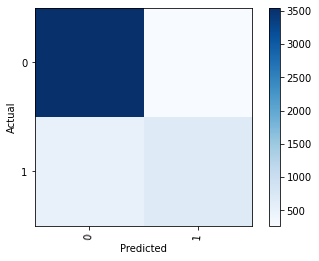

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline



def _evaluate(model, x_test):
  # Set the model to evaluate mode
  model.eval()

  # Get predictions for the test data
  x = torch.Tensor(x_test).float()
  _, predictions = torch.max(model(x).data, 1)
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  income_classes=['0','1']
  cm = confusion_matrix(y_test, predictions)
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, income_classes, rotation=85)
  plt.yticks(tick_marks, income_classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, x_test)

## 9) Optuna

In [ ]:
!pip install optuna

In [ ]:
import optuna
from optuna.trial import TrialState
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
def define_model(trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 4, 8)
    layers = []

    in_features = len(features)
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 64, 256)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.3, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, 2))
    layers.append(nn.Softmax())

    return nn.Sequential(*layers)

In [ ]:
DEVICE = torch.device("cpu")
BATCHSIZE = 64
EPOCHS = 30
LOG_INTERVAL = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 300
N_VALID_EXAMPLES = BATCHSIZE * 100

def objective(trial):

    # Generate the model.
    model = define_model(trial).to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    loss_criteria = nn.CrossEntropyLoss()
    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            # loss = F.nll_loss(output, target)
            loss = loss_criteria(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = torch.tensor(output.data[:, 1]>=0.5).float()
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(test_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-19 19:09:42,583] A new study created in memory with name: no-name-dbcfa2eb-e298-4fb1-862b-884a422b7b5f
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[I 2022-02-19 19:11:09,255] Trial 0 finished with value: 0.7622 and parameters: {'n_layers': 7, 'n_units_l0': 179, 'dropout_l0': 0.3860837708410817, 'n_units_l1': 199, 'dropout_l1': 0.4524483084689435, 'n_units_l2': 84, 'dropout_l2': 0.4273248524957388, 'n_units_l3': 80, 'dropout_l3': 0.34167195110219223, 'n_units_l4': 123, 'dropout_l4': 0.3876112789207476, 'n_units_l5': 199, 'dropout_l5': 0.44919861634

Study statistics: 
  Number of finished trials:  7
  Number of pruned trials:  0
  Number of complete trials:  7
Best trial:
  Value:  0.8544
  Params: 
    n_layers: 7
    n_units_l0: 110
    dropout_l0: 0.420491206579514
    n_units_l1: 92
    dropout_l1: 0.3259758480108703
    n_units_l2: 111
    dropout_l2: 0.36531894014539423
    n_units_l3: 138
    dropout_l3: 0.3658193217106271
    n_units_l4: 116
    dropout_l4: 0.36328172168561645
    n_units_l5: 206
    dropout_l5: 0.4328625224261037
    n_units_l6: 170
    dropout_l6: 0.35691963885936673
    optimizer: RMSprop
    lr: 0.00013002409199182837


In [ ]:
model = define_model(trial)

In [ ]:
loss_criteria = nn.CrossEntropyLoss()

optimizer = torch.optim.RMSprop(model.parameters(), lr=trial.params['lr'])
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 30 epochs
epochs = 30

In [ ]:
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
            

In [ ]:
# training through epoch
for epoch in range(1, epochs + 1):
    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training set: Average loss: 0.519137
Validation set: Average loss: 0.480868, Accuracy: 4162/5000 (83%)

Epoch: 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Training set: Average loss: 0.481585
Validation set: Average loss: 0.467636, Accuracy: 4205/5000 (84%)

Epoch: 3
Training set: Average loss: 0.472813
Validation set: Average loss: 0.461035, Accuracy: 4227/5000 (85%)

Epoch: 4
Training set: Average loss: 0.468209
Validation set: Average loss: 0.458768, Accuracy: 4247/5000 (85%)

Epoch: 5
Training set: Average loss: 0.466156
Validation set: Average loss: 0.458483, Accuracy: 4238/5000 (85%)

Epoch: 6
Training set: Average loss: 0.464852
Validation set: Average loss: 0.456665, Accuracy: 4239/5000 (85%)

Epoch: 7
Training set: Average loss: 0.462019
Validation set: Average loss: 0.455723, Accuracy: 4243/5000 (85%)

Epoch: 8
Training set: Average loss: 0.460924
Validation set: Average loss: 0.455184, Accuracy: 4247/5000 (85%)

Epoch: 9
Training set: Average loss: 0.460485
Validation set: Average loss: 0.454950, Accuracy: 4253/5000 (85%)

Epoch: 10
Training set: Average loss: 0.457439
Validation set: Average loss: 0.454174, Accuracy: 4255/500

In [ ]:
torch.save(model, 'model/income.pth')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Evaluation on test dataset
ACCURACY_SCORE:  0.854
F1_SCORE:  0.7908
CONFUSION_MATRIX:
 [[3509  302]
 [ 428  761]] 

              precision    recall  f1-score   support

           0     0.8913    0.9208    0.9058      3811
           1     0.7159    0.6400    0.6758      1189

    accuracy                         0.8540      5000
   macro avg     0.8036    0.7804    0.7908      5000
weighted avg     0.8496    0.8540    0.8511      5000
 



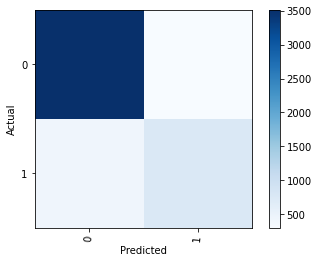

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def _evaluate(model, x_test):
  model.eval()
  x = torch.Tensor(x_test).float()
  _, predictions = torch.max(model(x).data, 1)
  predictions = torch.tensor(predictions)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
_evaluate(model, x_test)

Conclusion: Optuna find a neural architecture archiving up to 85.4% accuracy on train dataset and was higher than the original model with only 84.2%.

##10) Deploy model sử dụng flask

In [ ]:
income_data.dtypes

age                       int64
work_type              category
final_weight              int64
education              category
total_education_yrs       int64
marital_state          category
job                    category
status                 category
ethnicity              category
sex                    category
capital_gain              int64
capital_loss              int64
hrs_per_week              int64
nationality            category
dtype: object

In [ ]:
# Encoding numpy to json
import json
class NumpyEncoder(json.JSONEncoder):
    '''
    Encoding numpy into json
    '''
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.int32):
            return int(obj)
        if isinstance(obj, np.int64):
            return int(obj)
        if isinstance(obj, np.float32):
            return float(obj)
        if isinstance(obj, np.float64):
            return float(obj)
        return json.JSONEncoder.default(self, obj)

In [ ]:
import torch
import numpy as np
from flask import Flask, request
import flask
import json

# Khởi tạo model.
global model
model = None
# Khởi tạo flask app
app = Flask(__name__)

#normalize string
def string_normalize(s):
  s = str(s).lower().strip()
  s = re.sub(' +', ' ', s)
  return s

# Khai báo route cho API
@app.route("/predict", methods=["POST"])
# Khai báo hàm xử lý dữ liệu.
def _predict():
  data = {"success": False}
  request_body = request.json()
  if request_body:
    X_input =[]
    for i in income_data.columns.tolist():
      #Thêm trường có dữ liệu
      try:
        X_input.append(string_normalize(request_body[i]))
      # Không có dữ liệu thì thay bằng giá trị 0
      except:
        X_input.append('0')
    # Convert sang numpy array input
    X_input = torch.nn.functional.one_hot(X_input)
    model.eval()

    with torch.no_grad():
      # Get the predictions
      out = model(X_input)

      # Calculate the accuracy
      predicted = torch.tensor(out.data[:, 1]>=0.5).float()
    # Truyền vào data form response
    data["probability"] = predicted
    data["success"] = True
    return json.dumps(data, ensure_ascii=False, cls=NumpyEncoder)

if __name__ == "__main__":
  print("App run!")
  # Load model
  model = torch.load('model/income.pth')
  app.run(debug=False, host='localhost', threaded=False)

App run!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:5000/ (Press CTRL+C to quit)
